In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import math

Model Parameters

In [17]:
# Number of iterations and years
itr = 50000
yrs = 40

# Distribution parameters
ann_ret = 0.07
ann_vol = 0.10

ann_dist = 0.06 
dist_std_dev = 0.002

ann_contr = 500000000
contr_std_dev = 100000000

# Populate returns, distributions, contributions amounts
returns = np.random.normal(loc=ann_ret, scale=ann_vol, size=(itr, yrs))
dist = np.random.normal(loc=ann_dist, scale=dist_std_dev, size=(itr, yrs))
contr = np.random.normal(loc=ann_contr, scale=contr_std_dev, size=(itr, yrs))

Simulation

In [46]:
# Initialize balance matrix
bal = np.zeros((itr, yrs))
bal[:, 0] = 6500000000

# Initialize distribution tab matrix
dist_tab = np.zeros((itr, yrs))

# Simulate Y years
for y in range(1, yrs):
    prev_bal = bal[:, y-1]
    
    if y <= 30:
        # First 25 years
        bal[:, y] = prev_bal + (prev_bal * returns[:, y]) - dist[:, y] * (prev_bal + prev_bal * returns[:, y]) + contr[:, y]
    else:
        # Last 25 years
        dist[:, y] = dist[:, y] + 0.3
        bal[:, y] = prev_bal + (prev_bal * returns[:, y]) - dist[:, y] * (prev_bal + prev_bal * returns[:, y]) + contr[:, y] # Shifting distribution of amt given away up
    
    # Calculate distributions
    dist_tab[:, y] = prev_bal * dist[:, y]

# Convert balance and dist_tab to DataFrames if needed for further processing
bal_df = pd.DataFrame(bal)
dist_tab_df = pd.DataFrame(dist_tab)

# Record sum of all distributions given
dist_tab_df['Sum'] = dist_tab_df.sum(axis=1)

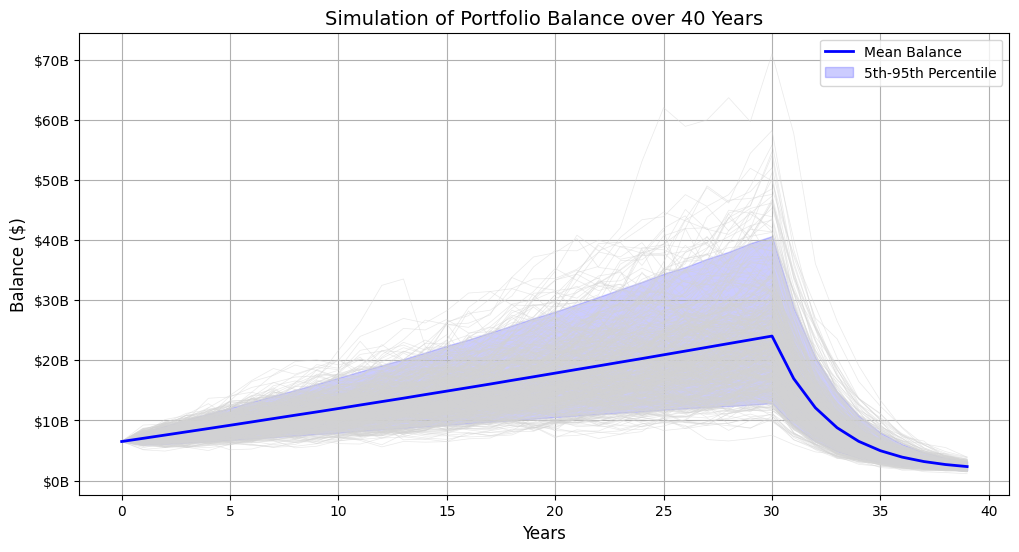

In [74]:
# Plotting
plt.figure(figsize=(12, 6))  # Increased figure size for better readability

# Plot a sample of the simulations
sample_size = 500  # Number of simulations to plot
sample_indices = np.random.choice(itr, sample_size, replace=False)
for i in sample_indices:
    plt.plot(bal_df.columns, bal_df.iloc[i], color='lightgray', alpha=0.5, linewidth=0.5)

# Plot mean and percentiles
mean_balance = bal_df.mean(axis=0)
percentile_5th = bal_df.quantile(0.05, axis=0)
percentile_95th = bal_df.quantile(0.95, axis=0)

plt.plot(bal_df.columns, mean_balance, color='blue', linewidth=2, label='Mean Balance')
plt.fill_between(bal_df.columns, percentile_5th, percentile_95th, color='blue', alpha=0.2, label='5th-95th Percentile')

# Adding labels, title, and grid
plt.xlabel('Years', fontsize=12)
plt.ylabel('Balance ($)', fontsize=12)
plt.title(f'Simulation of Portfolio Balance over {yrs} Years', fontsize=14)
plt.grid(True)
plt.legend()
scale = 10**int(np.floor(np.log10(bal_df.mean(axis=0).iloc[-1])))
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x / scale :.0f}B'))

# Display the plot
plt.show()

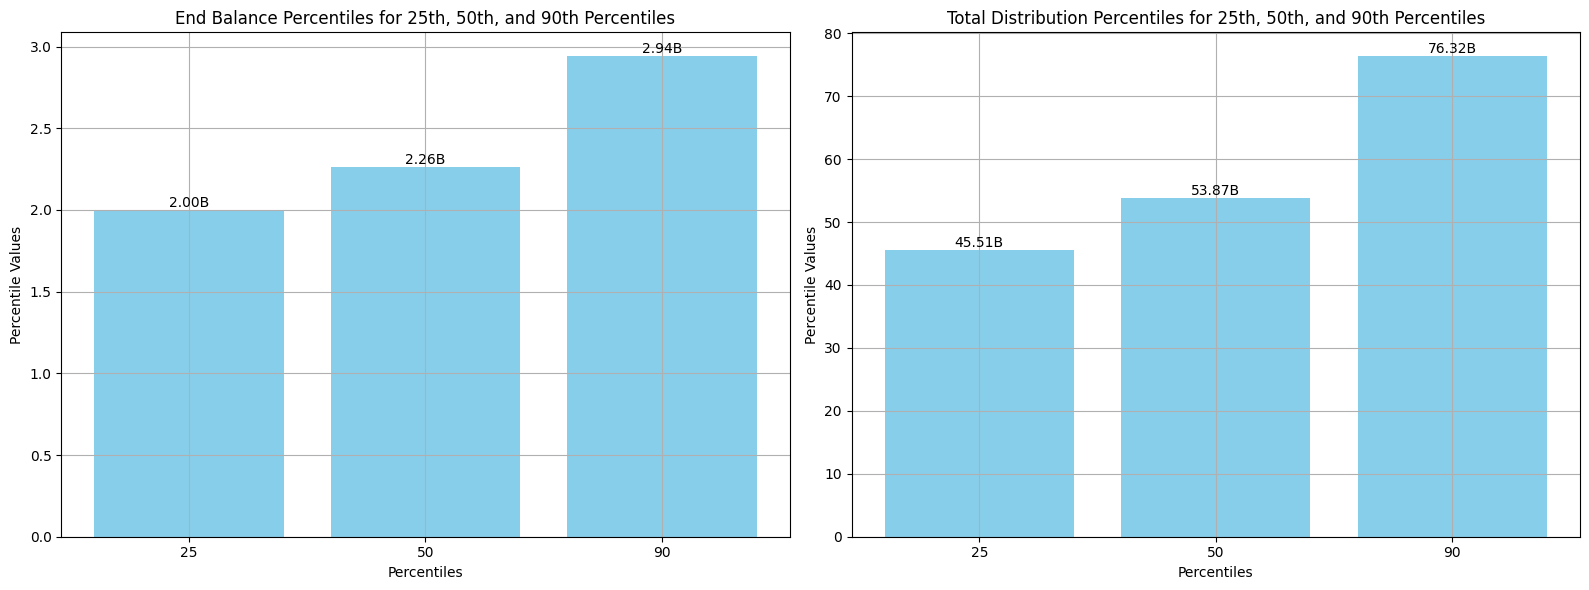

In [48]:
# Calculate and print percentiles for end balances
percentiles = [25, 50, 90]
percentile_values_end_balance = np.percentile(bal_df.iloc[:, -1], percentiles)

# Convert values to billions of dollars
percentile_values_end_balance_billion = percentile_values_end_balance / 1e9

# Calculate and print percentiles for total distributions
percentile_values_distributions = np.percentile(dist_tab_df['Sum'], percentiles)

# Convert values to billions of dollars
percentile_values_distributions_billion = percentile_values_distributions / 1e9

# Plotting the percentiles as a bar chart for end balances and total distributions
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

# End Balances plot
bars1 = ax1.bar([str(p) for p in percentiles], percentile_values_end_balance_billion, color='skyblue')
ax1.set_xlabel('Percentiles')
ax1.set_ylabel('Percentile Values')
ax1.set_title('End Balance Percentiles for 25th, 50th, and 90th Percentiles')
ax1.grid(True)

# Annotate each bar with the value in billions for end balances
for bar, value in zip(bars1, percentile_values_end_balance_billion):
    yval = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}B', ha='center', va='bottom')

# Total Distributions plot
bars2 = ax2.bar([str(p) for p in percentiles], percentile_values_distributions_billion, color='skyblue')
ax2.set_xlabel('Percentiles')
ax2.set_ylabel('Percentile Values')
ax2.set_title('Total Distribution Percentiles for 25th, 50th, and 90th Percentiles')
ax2.grid(True)

# Annotate each bar with the value in billions for total distributions
for bar, value in zip(bars2, percentile_values_distributions_billion):
    yval = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width() / 2, yval, f'{value:.2f}B', ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

In [45]:
dist_tab_df

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,Sum
0,0.0,3.758301e+08,4.087667e+08,4.173201e+08,4.549786e+08,4.631300e+08,3.865755e+08,4.823575e+08,5.273541e+08,4.927159e+08,...,1.200183e+09,8.078477e+08,7.189646e+08,5.029513e+08,3.340907e+08,2.798751e+08,2.056237e+08,1.738310e+08,1.390384e+08,2.405670e+10
1,0.0,4.073871e+08,3.809982e+08,3.854607e+08,4.383716e+08,4.452472e+08,5.610650e+08,6.196041e+08,6.974736e+08,6.967779e+08,...,1.186302e+09,8.074006e+08,5.822540e+08,4.283107e+08,2.876764e+08,2.027407e+08,1.507930e+08,1.296106e+08,1.262727e+08,2.888089e+10
2,0.0,3.881532e+08,3.817938e+08,4.779569e+08,4.801748e+08,5.392965e+08,4.744287e+08,4.114125e+08,4.730980e+08,4.064205e+08,...,1.058451e+09,7.410880e+08,6.549032e+08,4.137128e+08,3.197789e+08,2.445042e+08,1.753543e+08,1.216493e+08,1.146525e+08,2.469320e+10
3,0.0,4.140721e+08,3.757763e+08,4.349811e+08,3.926585e+08,4.453607e+08,5.668142e+08,7.244241e+08,8.040850e+08,9.779298e+08,...,1.866779e+09,1.199831e+09,8.424867e+08,5.684708e+08,4.080241e+08,3.113460e+08,2.830667e+08,1.825512e+08,1.836352e+08,3.962078e+10
4,0.0,4.044868e+08,4.123805e+08,3.736368e+08,4.164201e+08,4.522978e+08,4.923045e+08,5.510779e+08,6.061468e+08,6.510311e+08,...,1.282737e+09,8.418103e+08,6.383332e+08,4.913104e+08,4.003371e+08,3.295561e+08,2.835710e+08,2.314034e+08,1.915287e+08,2.768066e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,3.924053e+08,3.934698e+08,4.080991e+08,4.502540e+08,4.433050e+08,5.335921e+08,5.918231e+08,5.353459e+08,4.651647e+08,...,1.083055e+09,7.327182e+08,5.281262e+08,3.649525e+08,3.049552e+08,2.283710e+08,1.792797e+08,1.677600e+08,1.250886e+08,2.658167e+10
49996,0.0,3.884403e+08,4.282513e+08,5.517233e+08,6.493989e+08,6.924513e+08,7.042436e+08,7.106879e+08,7.394116e+08,9.633284e+08,...,1.330935e+09,7.842211e+08,5.766348e+08,4.935700e+08,3.695674e+08,2.739378e+08,2.135723e+08,1.901436e+08,1.506662e+08,3.168652e+10
49997,0.0,4.171148e+08,4.657061e+08,4.080219e+08,5.301951e+08,5.501799e+08,6.912131e+08,7.374096e+08,8.139344e+08,8.232886e+08,...,1.121257e+09,7.096299e+08,5.290575e+08,4.918504e+08,3.714111e+08,2.801756e+08,2.125882e+08,2.075794e+08,1.625431e+08,3.125241e+10
49998,0.0,4.006154e+08,5.191358e+08,5.400942e+08,5.709218e+08,6.890639e+08,6.981568e+08,6.232415e+08,7.048142e+08,7.195136e+08,...,9.247558e+08,5.912772e+08,4.257509e+08,2.946621e+08,2.391567e+08,1.973403e+08,1.911212e+08,1.932879e+08,1.742432e+08,2.414960e+10


In [8]:
pd.DataFrame(dist.mean(axis=0))

,0
0,0.060005
1,0.059992
2,0.059990
3,0.060003
4,0.060008
5,0.059991
6,0.059995
7,0.059992
8,0.060001
9,0.060005


In [9]:
percentages = dist.mean(axis=0)

# Convert to percentages and round to two decimal places
percentages_rounded = np.round(percentages * 100, 3)

# Create a DataFrame with these percentages
df = pd.DataFrame(percentages_rounded, columns=['Percentage (%)'])

# Transpose the DataFrame for horizontal display
df_transposed = df.T
df_transposed.columns = [f'Year {i+1}' for i in range(len(df))]

# Ensure values are rounded to two decimal places
df_transposed = df_transposed.applymap(lambda x: f"{x:.3f}%")

# Display the title and the DataFrame
print("Amount Distributed Each Year\n")
df_transposed

Amount Distributed Each Year



,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10,Year 11,Year 12,Year 13,Year 14,Year 15,Year 16,Year 17,Year 18,Year 19,Year 20
Percentage (%),6.000%,5.999%,5.999%,6.000%,6.001%,5.999%,5.999%,5.999%,6.000%,6.000%,6.000%,5.999%,6.001%,6.001%,5.999%,6.000%,6.000%,6.000%,6.000%,6.000%
